In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Obtainning the individual participant data

In [317]:
path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Weighted 4 out of 4/01_Martina/com'
# path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Latency/00_Dong/com/TLX/'

participant = str(1)

csv_files = glob.glob(path +'/*.csv')
t_df_lst = [pd.read_csv(i) for i in csv_files]

tlx_1 = t_df_lst[0]
tlx_2 = t_df_lst[1]
tlx_3 = t_df_lst[2]
NASA_names = pd.Index(tlx_2['Test'])

In [318]:
tlx_1
# tlx_2
tlx_3

,Test,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10
0,Mental demand,30,30,30,40,40,40,40,50,50,60
1,Physical demand,60,70,70,80,80,80,80,90,90,100
2,Temporal performance ( how hurried),50,50,50,50,60,50,50,60,50,60
3,Performance,60,60,70,70,50,70,90,60,70,80
4,Effort,80,90,90,90,90,90,100,100,90,100
5,Frustration,20,30,30,50,60,30,30,50,40,60
6,Motivation,100,100,100,100,100,100,100,90,90,90
7,bnb score,9,9,11,10,8,11,17,11,13,14


## tlx_all Return 1x3x8 array ---> 3 sets, each for a NASA question (8 questions in tot)

In [319]:

def plt_TLX(tst_0 = tlx_1, tst_500 = tlx_2, tst_1kg = tlx_3, participant = 'Ignore', path = path):
  x = range(1,len(tst_0.columns))
  level_0, level_1, level_2 = [[] for i in range(0,3)]

  for i in pd.Index(tst_0['Test']):
    lst_NASA_name = pd.Index(tst_0['Test']).get_loc(i) 
    y0 = tst_0.iloc[lst_NASA_name].to_list()
    y_0_axis = y0[1:]
    y0 = [float(i) for i in y_0_axis]
    
    y1 = tst_500.iloc[lst_NASA_name].to_list()
    y_1_axis = y1[1:]
    y1 = [float(i) for i in y_1_axis]

    y2 = tst_1kg.iloc[lst_NASA_name].to_list()
    y_2_axis = y2[1:]
    y2 = [float(i) for i in y_2_axis]

    level_0.append(y0)
    level_1.append(y1)
    level_2.append(y2)

  return level_0,level_1,level_2
plt_TLX()

([[30.0, 50.0, 50.0, 60.0, 50.0, 40.0, 50.0, 50.0, 40.0, 50.0],
  [30.0, 40.0, 50.0, 50.0, 60.0, 50.0, 60.0, 60.0, 70.0, 79.0],
  [30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0],
  [70.0, 50.0, 60.0, 70.0, 80.0, 80.0, 60.0, 70.0, 80.0, 70.0],
  [90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0],
  [0.0, 50.0, 50.0, 60.0, 50.0, 40.0, 50.0, 40.0, 40.0, 50.0],
  [80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0],
  [14.0, 9.0, 12.0, 14.0, 16.0, 18.0, 14.0, 13.0, 19.0, 16.0]],
 [[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 50.0, 50.0],
  [40.0, 50.0, 50.0, 50.0, 60.0, 60.0, 70.0, 70.0, 80.0, 90.0],
  [40.0, 40.0, 40.0, 40.0, 50.0, 40.0, 40.0, 40.0, 40.0, 40.0],
  [60.0, 60.0, 90.0, 90.0, 90.0, 90.0, 80.0, 70.0, 80.0, 80.0],
  [90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0],
  [50.0, 50.0, 40.0, 50.0, 40.0, 40.0, 70.0, 70.0, 70.0, 50.0],
  [80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0],
  [13.0, 13.0, 17.0, 17.0, 19.0, 19.0, 18

Group & organise data into individual NASA questions
e.g.  
tlx_all[0]
--> return data frame for ['set 1','set 2','set 3'] in 'Mental demand'
This is for individual participant only, so only have 3 rows

In [321]:
def organise_sets(data = plt_TLX(), NASA_names =pd.Index(tlx_2['Test'])):
    s1 = data[0] # set 1
    s2 = data[1] # set 2
    s3 = data[2] # set 3
    data_name = [[] for i in range(0,len(NASA_names))]
    
    # set 1, set 2, set 3 index
    idx = [('set '+str(i+1)) for i in range(0,3)]

    for i in range(0,len(NASA_names)):
        print([s1[i],s2[i],s3[i]])
        data_name[i] = pd.DataFrame([s1[i],s2[i],s3[i]]) # 8*set 1

        # add a column that identify sets, then add the string name of the data
        data_name[i].index = pd.Series(idx)
        data_name[i].reset_index(inplace = True)
        data_name[i].index = pd.Series(NASA_names[i] for j in range(0,len(data_name[i])))
        data_name[i].reset_index(inplace = True)
        # reset the column name to 'Sets'
        data_name[i].rename(columns ={'index':'Sets','level_0': 'Test name'}, inplace = True)

    return data_name

tlx_all = organise_sets()
tlx_all

[[30.0, 50.0, 50.0, 60.0, 50.0, 40.0, 50.0, 50.0, 40.0, 50.0], [40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 50.0, 50.0], [30.0, 30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 60.0]]
[[30.0, 40.0, 50.0, 50.0, 60.0, 50.0, 60.0, 60.0, 70.0, 79.0], [40.0, 50.0, 50.0, 50.0, 60.0, 60.0, 70.0, 70.0, 80.0, 90.0], [60.0, 70.0, 70.0, 80.0, 80.0, 80.0, 80.0, 90.0, 90.0, 100.0]]
[[30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0], [40.0, 40.0, 40.0, 40.0, 50.0, 40.0, 40.0, 40.0, 40.0, 40.0], [50.0, 50.0, 50.0, 50.0, 60.0, 50.0, 50.0, 60.0, 50.0, 60.0]]
[[70.0, 50.0, 60.0, 70.0, 80.0, 80.0, 60.0, 70.0, 80.0, 70.0], [60.0, 60.0, 90.0, 90.0, 90.0, 90.0, 80.0, 70.0, 80.0, 80.0], [60.0, 60.0, 70.0, 70.0, 50.0, 70.0, 90.0, 60.0, 70.0, 80.0]]
[[90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0], [90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0], [80.0, 90.0, 90.0, 90.0, 90.0, 90.0, 100.0, 100.0, 90.0, 100.0]]
[[0.0, 50.0, 50.0, 60.0, 50.0, 40.0, 50.0, 40.0, 40.0, 50.0],

[       Test name   Sets     0     1     2     3     4     5     6     7     8  \
 0  Mental demand  set 1  30.0  50.0  50.0  60.0  50.0  40.0  50.0  50.0  40.0   
 1  Mental demand  set 2  40.0  40.0  40.0  40.0  40.0  40.0  60.0  60.0  50.0   
 2  Mental demand  set 3  30.0  30.0  30.0  40.0  40.0  40.0  40.0  50.0  50.0   
 
       9  
 0  50.0  
 1  50.0  
 2  60.0  ,
           Test name   Sets     0     1     2     3     4     5     6     7  \
 0  Physical demand   set 1  30.0  40.0  50.0  50.0  60.0  50.0  60.0  60.0   
 1  Physical demand   set 2  40.0  50.0  50.0  50.0  60.0  60.0  70.0  70.0   
 2  Physical demand   set 3  60.0  70.0  70.0  80.0  80.0  80.0  80.0  90.0   
 
       8      9  
 0  70.0   79.0  
 1  80.0   90.0  
 2  90.0  100.0  ,
                              Test name   Sets     0     1     2     3     4  \
 0  Temporal performance ( how hurried)  set 1  30.0  40.0  40.0  40.0  40.0   
 1  Temporal performance ( how hurried)  set 2  40.0  40.0  40.0  40.0  50

# plotting individual participant results

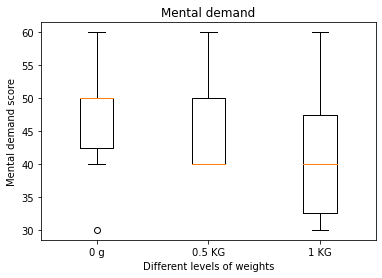

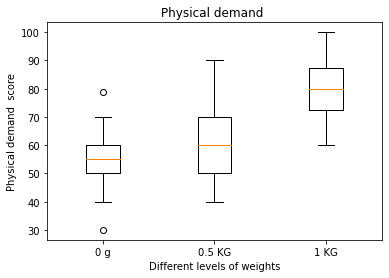

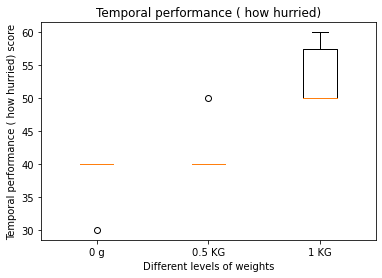

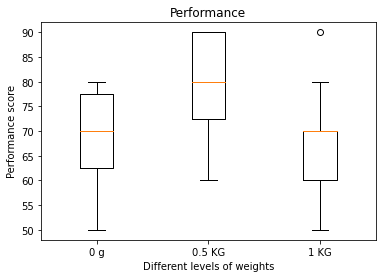

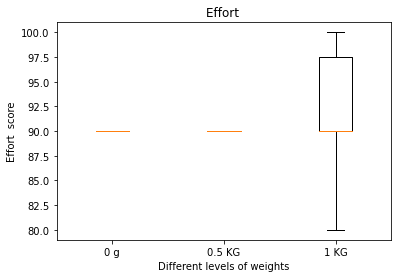

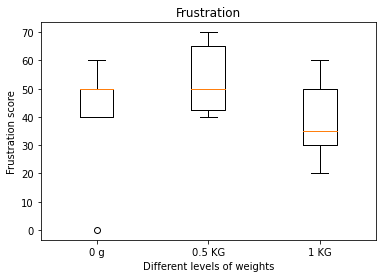

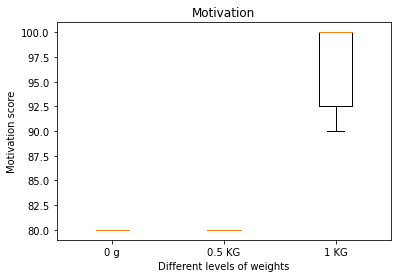

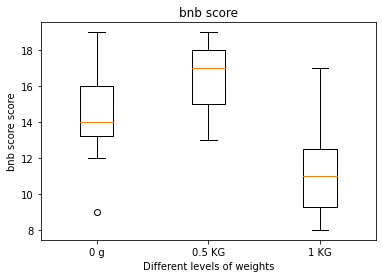

In [322]:
# tlx_all[0] ---> mental
# .iloc[0,2:]---> first row data, excluded the string data

def plt_sets(data_name = tlx_all, test ='Human', NASA_names =pd.Index(tlx_2['Test'])):
    path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/'+test+'/combine/'
    # x = ['0ms delay', '150ms delay', '300ms delay']
    if test == 'Weighted' or 'Human':
        x =['0 g', '0.5 KG', '1 KG']
        x_l = 'Different levels of weights'
    elif test =='Latency': 
        x = ['0ms delay', '150ms delay', '300ms delay']
        x_l = 'Different latency levels'

    data = [[] for i in range(0, len(data_name))]
    for i in range(0, len(data_name)):
        s1_data = data_name[i].iloc[0,2:]
        s2_data = data_name[i].iloc[1,2:]
        s3_data = data_name[i].iloc[2,2:]
        data[i] = [s1_data,s2_data,s3_data]
        plt.boxplot(data[i], labels = x)
        plt.title(NASA_names[i])
        plt.xlabel(x_l)
        plt.ylabel(NASA_names[i]+' score')
        plt.show()
        # # plt.savefig(path+'p-'+participant+' '+NASA_names[i]+' variation at different '+test+' level'+'.jpg')
# each set of data has 8 rows; 8 questions
# combine question[i] for set 1,2 and 3
# create a data frame for each of the 8 question with sets combined: mental 1, mental 2, mental 3
plt_sets()

# Combine & concating all data generated from tlx_all (individual)
---> 3 sets of data for all 8 questions concat into a big data frame
24 x 11
24 = 3 sets x 8 questions
11 = 1 Set_name x 10 trials

In [545]:
test = 'Human'
path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/'+test+' 4 out of 4'+'/combine/NASA/'

combine = pd.concat([tlx_all[i] for i in range(0,len(NASA_names))],axis=0)
combine.reset_index(drop=True,inplace=True)
combine
combine.to_csv(path+participant+'NASA.csv')


# Combine all participant data

Still need to do this for weighted 

In [546]:
test

'Human'

In [9]:
# reading the files without the extra 'unnamed col'
import glob

path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_NASA_4/'


files = glob.glob(path+'/*.csv')
p_lst = (pd.read_csv(i, index_col=[0]) for i in files)

for i in range(0, len([p_lst])):
    combine = pd.concat(p_lst)
combine = combine.iloc[:,:12]
# combine.to_csv(path +'combined_all'+'.csv')

In [308]:
combine

,Test name,Sets,0,1,2,3,4,5,6,7,8,9
0,Mental demand,set 1,30.0,10.0,40.0,20.0,30.0,40.0,35.0,20.0,25.0,30.0
1,Mental demand,set 2,65.0,70.0,60.0,50.0,40.0,30.0,20.0,10.0,35.0,15.0
2,Mental demand,set 3,70.0,80.0,70.0,80.0,60.0,90.0,70.0,70.0,50.0,60.0
3,Physical demand,set 1,20.0,10.0,50.0,20.0,30.0,45.0,35.0,20.0,30.0,30.0
4,Physical demand,set 2,60.0,70.0,60.0,50.0,60.0,30.0,20.0,15.0,40.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19,Motivation,set 2,60.0,60.0,70.0,70.0,80.0,80.0,80.0,80.0,85.0,85.0
20,Motivation,set 3,70.0,75.0,80.0,85.0,80.0,80.0,70.0,80.0,40.0,50.0
21,bnb score,set 1,7.0,8.0,4.0,6.0,11.0,10.0,11.0,15.0,17.0,15.0
22,bnb score,set 2,3.0,5.0,4.0,3.0,3.0,6.0,2.0,4.0,4.0,5.0


In [10]:
# return the indices of the desired NASA test name, as pd.Index() return an array of T/F
# we return the indice when the condition = true
num_sets = 3
# converting the T/F array to a list of index which will then be used in set_loc
def find_idx(data):
    ls =[]
    for i in range(0,len(data)):
        if data[i]:
            ls.append(i)
    return ls
        

def set_loc(test_name):
    tst_name = pd.Index(combine['Test name']).get_loc(test_name) # get the location of desired set name, e.g. 'Mental command
    name_idx = find_idx(tst_name)
    name_frame = combine.iloc[name_idx,:12]
    name_frame.reset_index(drop=True, inplace = True)

    sets = ['set 1', 'set 2', 'set 3']
    set_frame = [[] for i in range(0,num_sets)]
    for i in range(0, len(sets)):
        set_name  = pd.Index(name_frame['Sets']).get_loc(sets[i])
        set_idx = find_idx(set_name)
        set_frame[i] = name_frame.iloc[set_idx,:12]
        set_frame[i].reset_index(drop = True, inplace = True)

    return set_frame


In [323]:
# mental_d = set_loc('Mental demand')

# This function provide the according name as well as set separation of the data
# data[0] is mental demand with all 3 sets of data, 
# data[0][0] = set 1
# data[0][1] = set 2
def nasa_name_set():
    names = pd.Index(tlx_1['Test'])
    data = [[] for i in range(0, len(names))]
    for i in range(0,len(names)):
        data[i] = set_loc(names[i])
    return data

separated_data = nasa_name_set()

In [324]:
separated_data[0]

[       Test name   Sets     0     1     2     3     4     5     6     7     8  \
 0  Mental demand  set 1  30.0  10.0  40.0  20.0  30.0  40.0  35.0  20.0  25.0   
 1  Mental demand  set 1  90.0  85.0  90.0  90.0  90.0  90.0  90.0  90.0  92.0   
 2  Mental demand  set 1  20.0  35.0  40.0  50.0  70.0  60.0  60.0  75.0  70.0   
 3  Mental demand  set 1  75.0  70.0  60.0  70.0  80.0  80.0  70.0  60.0  70.0   
 4  Mental demand  set 1  30.0  10.0  40.0  20.0  30.0  40.0  35.0  20.0  25.0   
 5  Mental demand  set 1  90.0  85.0  90.0  90.0  90.0  90.0  90.0  90.0  92.0   
 6  Mental demand  set 1  20.0  35.0  40.0  50.0  70.0  60.0  60.0  75.0  70.0   
 7  Mental demand  set 1  75.0  70.0  60.0  70.0  80.0  80.0  70.0  60.0  70.0   
 
       9  
 0  30.0  
 1  93.0  
 2  50.0  
 3  60.0  
 4  30.0  
 5  93.0  
 6  50.0  
 7  60.0  ,
        Test name   Sets     0     1     2      3      4      5      6      7  \
 0  Mental demand  set 2  65.0  70.0  60.0   50.0   40.0   30.0   20.0   10.0  

In [325]:
test = 'Latency'

In [329]:
np.asarray(separated_data[i][0].iloc[:9,2:])

array([[ 7., 10.,  8.,  7.,  7.,  3.,  6.,  7.,  9., 10.],
       [11., 12., 11., 12., 12.,  8., 12., 15., 10., 14.],
       [ 8.,  6.,  9., 10.,  8.,  9., 11.,  9.,  7., 11.],
       [ 7.,  8.,  4.,  6., 11., 10., 11., 15., 17., 15.],
       [ 7., 10.,  8.,  7.,  7.,  3.,  6.,  7.,  9., 10.],
       [11., 12., 11., 12., 12.,  8., 12., 15., 10., 14.],
       [ 8.,  6.,  9., 10.,  8.,  9., 11.,  9.,  7., 11.],
       [ 7.,  8.,  4.,  6., 11., 10., 11., 15., 17., 15.]])

In [346]:

def plt_com(data_name= separated_data, test = test, path=path):
    data = [[] for i in range(0, len(data_name))]

    if test == 'Weighted' or 'Human':
        x =['0 g', '0.5 KG', '1 KG']
        x_l = 'Different levels of weights'

    else: 
        x = ['0ms delay', '150ms delay', '300ms delay']
        x_l = 'Different latency levels'
    
    for i in range(0, len(data_name)):
        # s1_data = np.asarray(data_name[i][0].iloc[:9,2:]).flatten()
        # s2_data = np.asarray(data_name[i][1].iloc[:9,2:]).flatten()
        # s3_data = np.asarray(data_name[i][2].iloc[:9,2:]).flatten()

        s1_data = np.asarray(data_name[i][0].iloc[:9,2:])#.flatten()
        s2_data = np.asarray(data_name[i][1].iloc[:9,2:])#.flatten()
        s3_data = np.asarray(data_name[i][2].iloc[:9,2:])#.flatten()

        s1_m = np.mean(s1_data, axis = 0)
        s2_m = np.mean(s2_data, axis = 0)
        s3_m = np.mean(s3_data, axis = 0)

        s_1_std = np.std(s1_data, axis =0)
        s_2_std = np.std(s2_data, axis =0)
        s_3_std = np.std(s3_data, axis =0)
        
        # plt.plot(s1_m, label = 'set 1')
        # plt.fill_between(np.arange(10), s1_m + s_1_std, s1_m - s_1_std, alpha = 0.1)

        # plt.plot(s2_m, label ='set 2')
        # plt.fill_between(np.arange(10), s2_m + s_2_std, s2_m - s_2_std, alpha = 0.1)

        # plt.plot(s3_m, label = 'set 3')
        # plt.fill_between(np.arange(10), s3_m + s_3_std, s3_m - s_3_std, alpha = 0.1)
        # plt.ylim([0,100])
        # plt.title('Box plot')
        # plt.legend()
        # plt.show()
        
        # data[i] = [s1_data,s2_data,s3_data]
        # plt.boxplot(data[i],labels = x)
        # plt.title('Box plot for '+NASA_names[i])
        # plt.xlabel(x_l)
        # plt.ylabel(NASA_names[i]+' score')
        # plt.savefig(path + NASA_names[i]+' box plots'+'.jpg')
        # plt.show()
    
    # uncomment this return when wanting to get a combined array for ANOVA testing
    return data
plt_com()

[[], [], [], [], [], [], [], []]

## Saving the flattened array for ANOVA testing

In [349]:
a = plt_com()
dic = {}
keys = pd.Index(tlx_1['Test'])
val = a

for i in range(0,len(keys)):
    dic[keys[i]] = val[i]


{'Mental demand': [],
 'Physical demand ': [],
 'Temporal performance ( how hurried)': [],
 'Performance': [],
 'Effort ': [],
 'Frustration': [],
 'Motivation': [],
 'bnb score': []}

In [553]:
pd.DataFrame(dic).to_csv(path+'flattened array corresponding to each NASA test'+'.csv')

Reshaping the data format into set oriented

# testing method

In [279]:
s1_mental = pd.Series(hold.loc[0,'Mental demand'])
s2_mental = pd.Series(hold.loc[1,'Mental demand'])
s3_mental = pd.Series(hold.loc[2,'Mental demand'])

idx_s1 = ['set 1' for i in range(0,len(s1_mental))]
idx_s2 = ['set 2' for i in range(0,len(s2_mental))]
idx_s3 = ['set 3' for i in range(0,len(s3_mental))]

idx_1 = pd.Series(idx_s1)
idx_2 = pd.Series(idx_s2)
idx_3 = pd.Series(idx_s3)

s1_mental.index = idx_1
s2_mental.index = idx_2
s3_mental.index = idx_3

s1 = s1_mental.reset_index(drop=False)
s2 = s2_mental.reset_index(drop=False)
s3 = s3_mental.reset_index(drop=False)


s1.columns =['Sets','Mental demand']
s2.columns =['Sets','Mental demand']
s3.columns =['Sets','Mental demand']

tst = pd.concat([s1,s2,s3], axis = 0)


In [ ]:
# # ravel all the 'set 1', 2, and 3 data for 'mental demand'
# b = np.array([hold[0][0],
#               hold[1][0]],
#               )
# b.ravel()

# Remove random latency data

In [495]:
import random
ls =[1,2,3,4,5,6]
random.shuffle(ls)
ls

[4, 6, 1, 3, 2, 5]

In [556]:
ls.pop()
ls

[4, 6, 1, 3, 2]

In [557]:
random.shuffle(ls)
ls

[6, 4, 3, 1, 2]

In [558]:
ls.pop()
ls

[6, 4, 3, 1]